# Question_8_Solution:

1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
**Insights to be drawn -**

- Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json
from datetime import datetime
import requests
import json

In [16]:
response_API = requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')
data = response_API.text

# Parse JSON data
parse_json = json.loads(data)
parse_json

{'id': 1371,
 'url': 'https://www.tvmaze.com/shows/1371/westworld',
 'name': 'Westworld',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Drama', 'Science-Fiction', 'Western'],
 'status': 'Ended',
 'runtime': 60,
 'averageRuntime': 63,
 'premiered': '2016-10-02',
 'ended': '2022-08-14',
 'officialSite': 'http://www.hbo.com/westworld',
 'schedule': {'time': '21:00', 'days': ['Sunday']},
 'rating': {'average': 8.2},
 'weight': 99,
 'network': {'id': 8,
  'name': 'HBO',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'},
  'officialSite': 'https://www.hbo.com/'},
 'webChannel': None,
 'dvdCountry': None,
 'externals': {'tvrage': 37537, 'thetvdb': 296762, 'imdb': 'tt0475784'},
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg',
  'original': 'https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg'},
 'summary': '<p><b>Westworld</b> is a dark odyssey about the dawn of artifici

In [17]:
# Remove the first object
if "_embedded" in parse_json:
    filtered_data = parse_json["_embedded"].get("episodes")
    if filtered_data and len(filtered_data) > 0:
         filtered_data.pop(0)
        
print(filtered_data)

[{'id': 911201, 'url': 'https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut', 'name': 'Chestnut', 'season': 1, 'number': 2, 'type': 'regular', 'airdate': '2016-10-09', 'airtime': '21:00', 'airstamp': '2016-10-10T01:00:00+00:00', 'runtime': 60, 'rating': {'average': 7.7}, 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195436.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195436.jpg'}, 'summary': '<p>Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the deeper game, and Maeve finds herself in a world of hurt... literally.</p>', '_links': {'self': {'href': 'https://api.tvmaze.com/episodes/911201'}, 'show': {'href': 'https://api.tvmaze.com/shows/1371'}}}, {'id': 911204, 'url': 'https://www.tvmaze.com/episodes/911204/westworld-1x03-the-stray', 'name': 'The Stray', 'season': 1, 'number': 3, 'type': 'regular', 'airdate': '2016-10-16', 'airtime': '21:00', 'airstamp'

In [18]:
df = pd.json_normalize(filtered_data)
df

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,rating.average,image.medium,image.original,_links.self.href,_links.show.href
0,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,<p>Bernard suspects that someone is sabotaging...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371
1,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,<p>Bernard continues to investigate Dolores' s...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371
2,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,<p>While Dolores joins William and Logan on th...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371
3,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,<p>Dolores takes the first step on her path of...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371
4,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,"<p>While Maeve convinces Felix to show her ""up...",8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/932057,https://api.tvmaze.com/shows/1371
5,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,<p>While William and Dolores travel to the unc...,8.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/938404,https://api.tvmaze.com/shows/1371
6,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,2016-11-21T02:00:00+00:00,60,<p>Bernard tries to cope with what he did unde...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/943065,https://api.tvmaze.com/shows/1371
7,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,<p>Bernard forces Robert to take him back into...,8.5,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/943066,https://api.tvmaze.com/shows/1371
8,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,<p>Delores finds out the truth about William's...,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/943067,https://api.tvmaze.com/shows/1371
9,1214222,https://www.tvmaze.com/episodes/1214222/westwo...,Journey Into Night,2,1,regular,2018-04-22,21:00,2018-04-23T01:00:00+00:00,74,"<p>In the aftermath of the host rebellion, the...",7.8,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/1214222,https://api.tvmaze.com/shows/1371


In [19]:
df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'airstamp', 'runtime', 'summary', 'rating.average', 'image.medium',
       'image.original', '_links.self.href', '_links.show.href'],
      dtype='object')

In [20]:
# function to get air time in 12 hour format:
df['airtime']= pd.to_datetime(df['airtime'], format='%H:%M').dt.strftime('%I:%M %p')
#df['airtime']

In [21]:
# Extracing string by remove HTML tags from summary column:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Apply the function to the column:
df['summary'] = df['summary'].apply(remove_html_tags)

In [22]:
# Rename columns
df = df.rename(columns={'rating.average': 'average rating', 'image.medium': 'medium image link', 'image.original': 'Original image link'})

In [23]:
required_columns = ['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime', 'runtime', 'average rating', 'summary', 'medium image link', 'Original image link']

In [24]:
# final dataframe:
required_df = df[required_columns]
required_df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,Original image link
0,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,09:00 PM,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


# 1. Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [27]:
required_df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'runtime', 'average rating', 'summary', 'medium image link',
       'Original image link'],
      dtype='object')

In [34]:
# overall ratings for each season 
ans_1 = required_df.groupby('season')['average rating'].mean()
ans_1

season
1    8.1000
2    8.0000
3    7.7750
4    7.5375
Name: average rating, dtype: float64

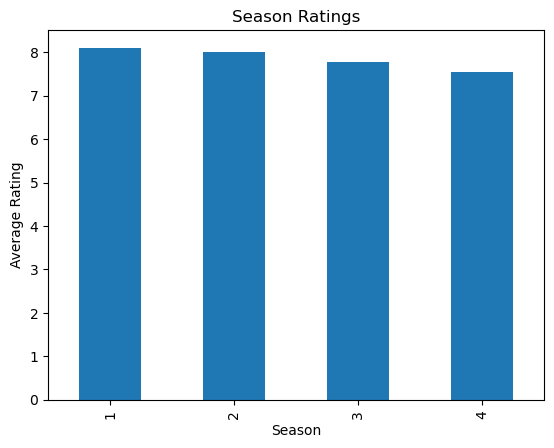

In [35]:
# Plotting the ratings for each season
ans_1.plot(kind='bar', xlabel='Season', ylabel='Average Rating', title='Season Ratings')
plt.show()

# 2. Get all the episode names, whose average rating is more than 8 for every season

In [98]:
# Getting all episodes name:
filtered_episodes = required_df[required_df['average rating'] > 8]
episode_names = filtered_episodes.groupby('season')['name'].apply(list)

# Displaying the episode names for each season
for season, episodes in episode_names.items():
    print(f"Season: {season}  => episode names with average rating > 8:")
    for episode in episodes:
        print(episode)
    print( )


Season: 1  => episode names with average rating > 8:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season: 2  => episode names with average rating > 8:
Kiksuya
Vanishing Point
The Passenger



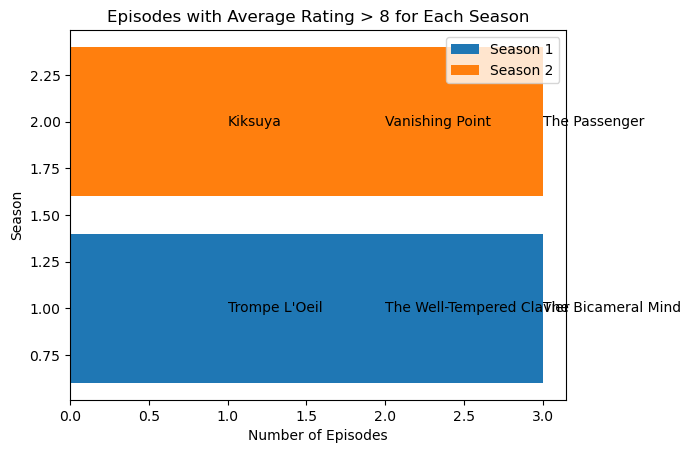

In [38]:
# Plotting the episode names for each season
fig, ax = plt.subplots()

for i, (season, episodes) in enumerate(episode_names.items(), start=1):
    ax.barh(season, len(episodes), label=f"Season {season}")
    for j, episode in enumerate(episodes):
        ax.text(j + 1, season, episode, va='center')

ax.set_xlabel('Number of Episodes')
ax.set_ylabel('Season')
ax.set_title('Episodes with Average Rating > 8 for Each Season')
ax.legend()

plt.show()

# 3. Get all the episode names that aired before May 2019

In [66]:
# All the episode names that aired before May 2019
filtered_episodes = required_df[required_df['airdate'] < '2019-05-01']
episode_names = filtered_episodes['name']
airdates = filtered_episodes['airdate']
for episode in episode_names:
    print(episode)

Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


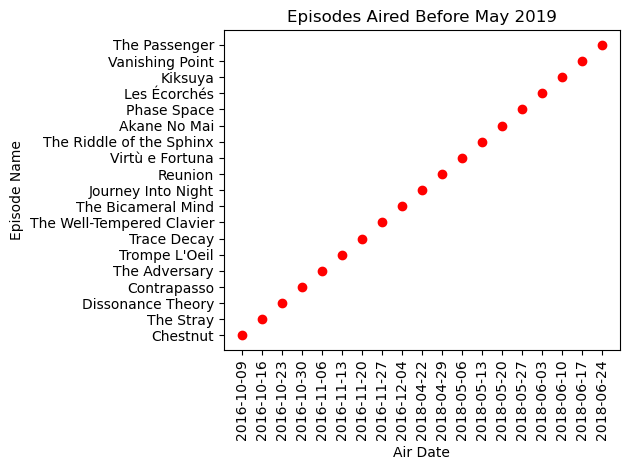

In [70]:
# Plotting the episode names with air dates
fig, ax = plt.subplots()

ax.scatter(airdates, episode_names, marker='o', color='red')
ax.set_xlabel('Air Date')
ax.set_ylabel('Episode Name')
ax.set_title('Episodes Aired Before May 2019')
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# 4. Get the episode name from each season with the highest and lowest rating

In [82]:
# Fetching unique values from season:
seasons = required_df['season'].unique()

# Initialize lists to store episode names and corresponding ratings
max_rating_names = []
max_ratings = []
min_rating_names = []
min_ratings = []

for season in seasons:
    season_data = required_df[required_df['season'] == season]
    
    # Get the episode with the highest rating
    max_rating_episode = season_data[season_data['average rating'] == season_data['average rating'].max()]
    max_rating_name = max_rating_episode['name'].values[0]
    max_rating = max_rating_episode['average rating'].values[0]
    
    # Get the episode with the lowest rating
    min_rating_episode = season_data[season_data['average rating'] == season_data['average rating'].min()]
    min_rating_name = min_rating_episode['name'].values[0]
    min_rating = min_rating_episode['average rating'].values[0]
    
    max_rating_names.append(max_rating_name)
    max_ratings.append(max_rating)
    min_rating_names.append(min_rating_name)
    min_ratings.append(min_rating)
    
    print(f"Season {season}:")
    print(f"Highest Rating: Episode '{max_rating_name}' with rating {max_rating}")
    print(f"Lowest Rating: Episode '{min_rating_name}' with rating {min_rating}")
    print()

Season 1:
Highest Rating: Episode 'The Bicameral Mind' with rating 8.7
Lowest Rating: Episode 'The Stray' with rating 7.6

Season 2:
Highest Rating: Episode 'Kiksuya' with rating 8.7
Lowest Rating: Episode 'Akane No Mai' with rating 7.6

Season 3:
Highest Rating: Episode 'Parce Domine' with rating 8.0
Lowest Rating: Episode 'Decoherence' with rating 7.5

Season 4:
Highest Rating: Episode 'Zhuangzi' with rating 7.8
Lowest Rating: Episode 'The Auguries' with rating 7.1



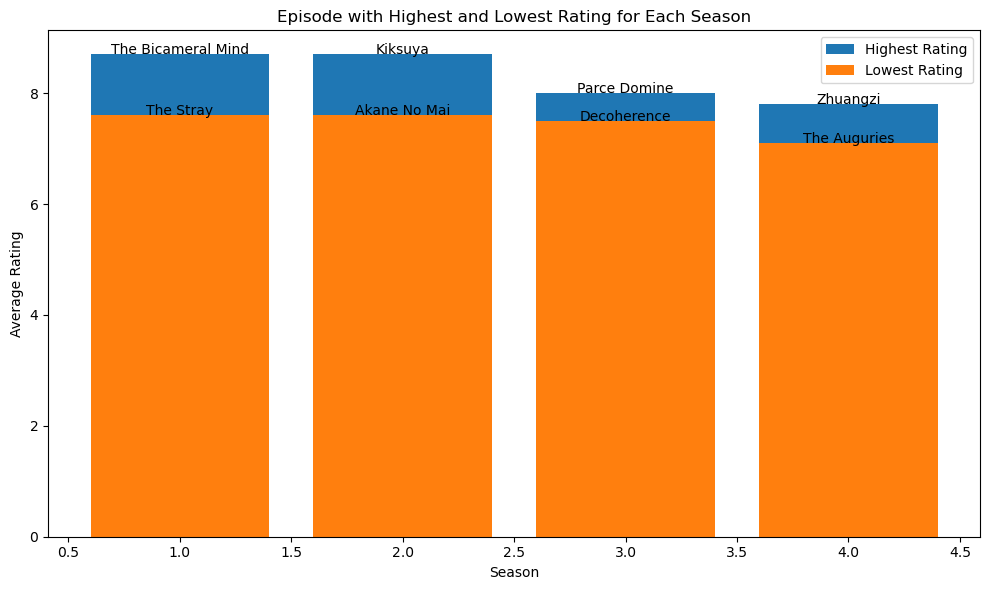

In [83]:
# Plotting the episode names with highest and lowest ratings for each season
plt.figure(figsize=(10, 6))

plt.bar(seasons, max_ratings, label='Highest Rating')
plt.bar(seasons, min_ratings, label='Lowest Rating')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Episode with Highest and Lowest Rating for Each Season')
plt.legend()

# Add labels for episode names
for i, season in enumerate(seasons):
    plt.text(season, max_ratings[i], max_rating_names[i], ha='center')
    plt.text(season, min_ratings[i], min_rating_names[i], ha='center')

plt.tight_layout()
plt.show()


# 5. Get the summary for the most popular ( ratings ) episode in every season

In [96]:
# Assuming your dataset is stored in a DataFrame called 'data'
seasons = required_df['season'].unique()

for season in seasons:
    season_data = required_df[required_df['season'] == season]
    
    # Get the most popular (highest rated) episode
    most_popular_episode = season_data[season_data['average rating'] == season_data['average rating'].max()]
    episode_name = most_popular_episode['name'].values[0]
    episode_summary = most_popular_episode['summary'].values[0]
        
    print(f"Season {season} - Most Popular Episode: {episode_name}")
    print( )
    print("Episode Summary:", episode_summary)
    print()

Season 1 - Most Popular Episode: The Bicameral Mind

Episode Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2 - Most Popular Episode: Kiksuya

Episode Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3 - Most Popular Episode: Parce Domine

Episode Summary: If you're stuck in a loop, try walking in a straight line.

Season 4 - Most Popular Episode: Zhuangzi

Episode Summary: God is bored.

